# Setup

Inspired by the code in this [tutorial](https://medium.com/towards-formula-1-analysis/formula-1-data-analysis-tutorial-2021-russian-gp-to-box-or-not-to-box-da6399bd4a39)

The goal of this notebook is to analyse the speed of each drivers according to their tyres. The analysis focuses on the race track that is divided in mini-sectors to check which part(s) of the track, drivers are the quickest/slowest.

In [1]:
import fastf1 as ff1 
from fastf1 import plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [2]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('../cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

# Race

In [5]:
race = ff1.get_session(2021,'Russia', 'R')

In [6]:
laps = race.load_laps(with_telemetry=True)

/Users/weiyiwang/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/fastf1/core.py:1093: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Russian Grand Prix - Race [v2.2.2]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cac

In [7]:
# Calculate RaceLapNumber (LapNumber minus 1 since the warmup lap is included in LapNumber)
laps['RaceLapNumber'] = laps['LapNumber'] - 1

# Starting from lap 45 it started raining
laps = laps.loc[laps['RaceLapNumber'] >= 45]

In [8]:
laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,RaceLapNumber
45,0 days 02:20:03.961000,44,0 days 00:01:38.942000,46,2,NaT,NaT,0 days 00:00:35.421000,0 days 00:00:34.746000,0 days 00:00:28.775000,...,HARD,20.0,True,0 days 02:18:25.019000,Mercedes,HAM,1,True,2021-09-26 13:19:26.912,45
46,0 days 02:21:46.573000,44,0 days 00:01:42.612000,47,2,NaT,NaT,0 days 00:00:35.607000,0 days 00:00:37.453000,0 days 00:00:29.552000,...,HARD,21.0,True,0 days 02:20:03.961000,Mercedes,HAM,1,True,2021-09-26 13:21:05.854,46
47,0 days 02:23:42.303000,44,0 days 00:01:55.730000,48,2,NaT,NaT,0 days 00:00:38.142000,0 days 00:00:44.200000,0 days 00:00:33.388000,...,HARD,22.0,True,0 days 02:21:46.573000,Mercedes,HAM,2,True,2021-09-26 13:22:48.466,47
48,0 days 02:25:39.182000,44,0 days 00:01:56.879000,49,2,NaT,0 days 02:25:30.666000,0 days 00:00:37.695000,0 days 00:00:43.480000,0 days 00:00:35.704000,...,HARD,23.0,True,0 days 02:23:42.303000,Mercedes,HAM,2,False,2021-09-26 13:24:44.196,48
49,0 days 02:27:45.498000,44,0 days 00:02:06.316000,50,3,0 days 02:26:00.701000,NaT,0 days 00:00:56.972000,0 days 00:00:38.328000,0 days 00:00:31.016000,...,INTERMEDIATE,1.0,True,0 days 02:25:39.182000,Mercedes,HAM,1,False,2021-09-26 13:26:41.075,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0 days 02:29:38.169000,9,0 days 00:02:06.584000,49,3,NaT,NaT,0 days 00:00:47.077000,0 days 00:00:43.912000,0 days 00:00:35.595000,...,INTERMEDIATE,3.0,True,0 days 02:27:31.585000,Haas F1 Team,MAZ,2,True,2021-09-26 13:28:33.478,48
944,0 days 02:31:43.118000,9,0 days 00:02:04.949000,50,3,NaT,NaT,0 days 00:00:45.959000,0 days 00:00:42.693000,0 days 00:00:36.297000,...,INTERMEDIATE,4.0,True,0 days 02:29:38.169000,Haas F1 Team,MAZ,2,True,2021-09-26 13:30:40.062,49
945,0 days 02:33:39.179000,9,0 days 00:01:56.061000,51,3,NaT,NaT,0 days 00:00:40.506000,0 days 00:00:40.430000,0 days 00:00:35.125000,...,INTERMEDIATE,5.0,True,0 days 02:31:43.118000,Haas F1 Team,MAZ,1,True,2021-09-26 13:32:45.011,50
991,0 days 02:21:25.832000,6,0 days 00:01:41.642000,46,2,NaT,NaT,0 days 00:00:35.953000,0 days 00:00:35.903000,0 days 00:00:29.786000,...,HARD,33.0,True,0 days 02:19:44.190000,Williams,LAT,1,True,2021-09-26 13:20:46.083,45


# Telemetry Data of Every Driver

In [9]:
drivers = pd.unique(laps['Driver'])

telemetry = pd.DataFrame()

#telemetry is only retrieved driver-by-driver

for driver in drivers:
    driver_laps = laps.pick_driver(driver) # pick_driver focuses on specific drivers' telemetry 
    
    for lap in driver_laps.iterlaps(): # equivalent to pandas iterrows()
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RaceLapNumber']
        driver_telemetry['Compound'] = lap[1]['Compound']
        
        telemetry = telemetry.append(driver_telemetry)

In [ ]:
telemetry

In [10]:
# let's keep the relevant columns i.e Lap, Distance, Compound, Speed, X, Y

telemetry = telemetry[['Lap', 'Distance', 'Compound', 'Speed', 'X', 'Y']]

# the tyres other than intermediates will be called 'SLICK'

telemetry['Compound'].loc[telemetry['Compound'] != 'INTERMEDIATE'] = 'SLICK'

In [ ]:
telemetry

# Mini-Sectors

In [11]:
# 25 mini sectors
n_mini_sectors = 25

# total distance

tot_distance = max(telemetry['Distance'])

mini_sector_length = tot_distance / n_mini_sectors

minisectors = [0]

for i in range(0, n_mini_sectors-1):
    minisectors.append(mini_sector_length * (i+1))

In [12]:
# Assign minisector to every row in the telemetry data
telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda z: (
    minisectors.index( # based on the distance, we can link the distance to its relevant sector
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)

In [13]:
average_speed = telemetry.groupby(['Lap', 'Minisector', 'Compound'])['Speed'].mean().reset_index()
average_speed

,Lap,Minisector,Compound,Speed
0,45,1,SLICK,211.026163
1,45,2,SLICK,265.163498
2,45,3,SLICK,291.645094
3,45,4,SLICK,301.053996
4,45,5,SLICK,300.683983
...,...,...,...,...
320,52,21,INTERMEDIATE,127.796267
321,52,22,INTERMEDIATE,141.092657
322,52,23,INTERMEDIATE,108.219251
323,52,24,INTERMEDIATE,209.708333


In [14]:
average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()

Lap  Minisector
45   1               0
     2               1
     3               2
     4               3
     5               4
                  ... 
52   21            320
     22            321
     23            322
     24            323
     25            324
Name: Speed, Length: 200, dtype: int64

In [15]:
fastest_compounds_on_sectors = average_speed.loc[average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()]

In [16]:
# Select the compound with the highest average speed
fastest_compounds = average_speed.loc[average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the Compound column
fastest_compounds = fastest_compounds[['Lap', 'Minisector', 'Compound']].rename(columns={'Compound': 'Fastest_compound'})

In [17]:
telemetry = telemetry.merge(fastest_compounds, on=['Lap', 'Minisector']) 
telemetry = telemetry.sort_values('Distance') # sort values so matplotlib works

In [21]:
#telemetry.drop(['Fastest_compound_x', 'Fastest_compound_y'],inplace=True, axis = 1)

In [22]:
telemetry

,Lap,Distance,Compound,Speed,X,Y,Minisector,Fastest_compound
0,45,0.000000,SLICK,178,1281,-416,1,SLICK
96359,50,0.000000,INTERMEDIATE,165,1281,-413,1,SLICK
96341,50,0.000000,INTERMEDIATE,162,1288,-405,1,SLICK
96238,50,0.000000,INTERMEDIATE,59,1154,-250,1,SLICK
96218,50,0.000000,INTERMEDIATE,156,1291,-401,1,SLICK
...,...,...,...,...,...,...,...,...
116477,50,5841.785278,SLICK,60,1203,-173,25,INTERMEDIATE
116478,50,5845.385278,SLICK,60,1180,-210,25,INTERMEDIATE
116479,50,5845.785278,SLICK,60,1177,-214,25,INTERMEDIATE
116480,50,5849.051944,SLICK,60,1154,-252,25,INTERMEDIATE


In [ ]:
# telemetry.loc[telemetry['Fastest_compound'] == "SOFT", 'Fastest_compound_int'] = 1
# telemetry.loc[telemetry['Fastest_compound'] == "MEDIUM", 'Fastest_compound_int'] = 2
# telemetry.loc[telemetry['Fastest_compound'] == "HARD", 'Fastest_compound_int'] = 3
# telemetry.loc[telemetry['Fastest_compound'] == "INTER", 'Fastest_compound_int'] = 4

In [23]:
telemetry.loc[telemetry['Fastest_compound'] == "INTERMEDIATE", 'Fastest_compound_int'] = 1
telemetry.loc[telemetry['Fastest_compound'] == 'SLICK', 'Fastest_compound_int'] = 2

In [ ]:
telemetry

In [24]:
def generate_minisector_plot(lap, save=False, details=True):
    
    single_lap = telemetry.loc[telemetry['Lap'] == lap]

    x = np.array(single_lap['X'].values)
    y = np.array(single_lap['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    compound = single_lap['Fastest_compound_int'].to_numpy().astype(float)

    cmap = cm.get_cmap('ocean', 2)
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(compound)
    lc_comp.set_linewidth(2)

    plt.rcParams['figure.figsize'] = [12, 5]
    
    if details:
        title = plt.suptitle(
            f"2021 Spanish GP \n Lap {lap} - Slicks vs. Inters"
        )
        
    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
    if details:
        cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
        cbar.set_ticks(np.arange(1.5, 9.5))
        cbar.set_ticklabels(['Inters', 'Slicks'])
    
    if save:
        plt.savefig(f"img/minisectors_lap_{lap}.png", dpi=300)

    plt.show()

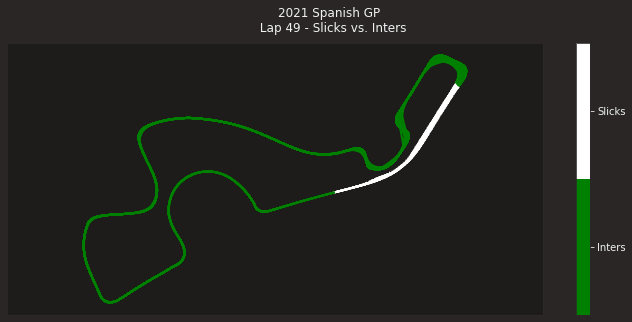

In [29]:
generate_minisector_plot(49, save=False, details=True) 